In [1]:
import gpaw
import ase
import matplotlib.pyplot as plt
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [4]:
def spc(s):
    d = 1.1
    h2 = ase.Atoms('N2', [(0, 0, 0), (0, 0, d)], pbc=True,)
    h2.center(vacuum=7)
    s = max(0.001, s)
    #
    pc = gpaw.external.PointChargePotential([-s, -s], h2.get_positions())
    pc.write = lambda _: None
    calc = gpaw.GPAW(mode=gpaw.PW(100),xc='LDA', txt='h2.txt', external=pc)
    h2.set_calculator(calc)
    h2.get_potential_energy()
    n  = calc.get_all_electron_density()
    dv = h2.get_volume() / calc.get_number_of_grid_points().prod()
    print (calc.get_pseudo_density().sum()*dv)
    calc.write('run.gpaw', mode='all')
    return h2
q = spc(0.9)

10.25236474467096


AttributeError: 'PointChargePotential' object has no attribute 'write'

In [13]:
def plot_calc(sys, label, axis):
    calc = sys.calc
    gridrefinement = 1  # needs to be 1!
    gridpos = calc.density.gd.get_grid_point_coordinates()
    dens = calc.get_all_electron_density(gridrefinement=gridrefinement)
    dv = sys.get_volume() / calc.get_number_of_grid_points().prod()
    dens *= dv / gridrefinement**3
    print ('total n electrons', dens.sum())
    xs = []
    ys = []
    gridz = sorted(set(gridpos[axis].reshape(-1)))
    for idx in range(len(gridz)):
        xs.append(gridz[idx])
        ys.append(np.sum(dens[np.where(gridpos[axis] == gridz[idx])]))
    plt.plot(xs, ys, label=label)
    #plt.ylim(0, max(ys)*1.1)
    plt.legend()

10.286944841870222
total n electrons 13.9999996493992
10.26520580088467
total n electrons 13.999999649347822
10.248595997772874
total n electrons 13.999999649341849


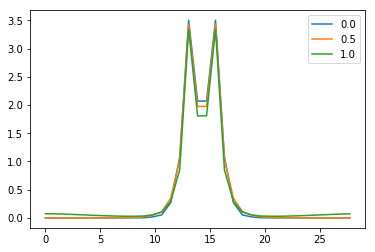

In [28]:
for sval in np.linspace(0, 1, 3):
    plot_calc(spc(sval), str(sval), 2)

10.123446303441346
total n electrons 13.999999649339797
10.138237299005626
total n electrons 13.999999649317608
10.161612530329517
total n electrons 13.999999649340298


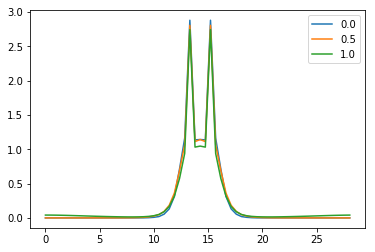

In [30]:
for sval in np.linspace(0, 1, 3):
    plot_calc(spc(sval), str(sval), 2)

In [3]:
help(gpaw.GPAW.write)

Help on function write in module gpaw.calculator:

write(self, filename, mode='')

